In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df1 = pd.read_csv("/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/article_event_matches_mergedII.csv")
df2 = pd.read_csv("/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/events02_diffbot.csv")


In [7]:
dupes = df2[df2['title'].duplicated(keep=False)]


In [11]:
dupes['title'][1]

"Ethiopia's Tigray conflict: Civilian bloodbath warning as offensive escalates"

In [37]:
df1.entities_Group

0       ['October', 'Ethiopian', 'Abiy Ahmed', 'Tigray...
1       ['Eritrea', 'Ethiopia', 'Northern Tigray', 'fi...
2       ['Ethiopia', 'Afar', 'Sunday', 'eight-month', ...
3       ['Ethiopia', 'six-month', 'Tuesday', 'Tigray',...
4       ['March', 'early October', 'Tigrayan', 'Septem...
                              ...                        
3313    ['Maryland', 'Ben Cardin', 'U.S.', 'Chris Van ...
3314    ['Friday', 'Ethiopia', 'Tigrayans', 'Amnesty I...
3315    ['Rebels', 'Ethiopia', 'Addis Ababa', 'tens of...
3316    ['the Voice of America', 'VOA', 'VOA News', 'J...
3317    ['JOHANNESBURG', 'first', 'Ethiopian', 'Tigray...
Name: entities_Group, Length: 3318, dtype: object

In [36]:
# If entities are lists, explode them first
df1_exploded = df1.explode('entities_Group')
df2_exploded = df2.explode('entities_Group')

# Get unique entities per dataset
entities_a = set(df1_exploded['entities_Group'].dropna().unique())
entities_b = set(df2_exploded['entities_Group'].dropna().unique())


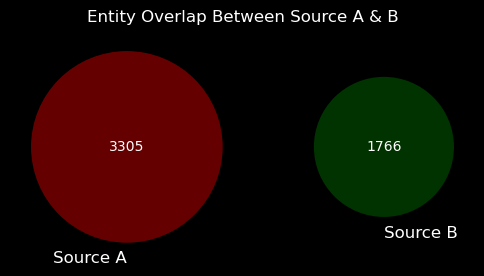

In [4]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
venn2([entities_a, entities_b], set_labels=('Source A', 'Source B'))
plt.title("Entity Overlap Between Source A & B")
plt.show()


In [5]:
df1.describe()
df2.describe()
df1.info()
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3318 non-null   object 
 1   author                  802 non-null    object 
 2   source                  3318 non-null   object 
 3   content                 3318 non-null   object 
 4   topic                   0 non-null      float64
 5   url                     3318 non-null   object 
 6   keywords                3091 non-null   object 
 7   query                   0 non-null      float64
 8   cleaned_content         3318 non-null   object 
 9   entities                3318 non-null   object 
 10  article_id              3318 non-null   int64  
 11  entities_Group          3318 non-null   object 
 12  labels_Group            3318 non-null   object 
 13  Key_Phrases             3318 non-null   object 
 14  Actions                 3318 non-null   

In [6]:
# Suppose each dataset has an 'entities' column
entities_a = set(df1['entities_Group'].explode())
entities_b = set(df2['entities_Group'].explode())

# Common and unique entities
common = entities_a & entities_b
only_a = entities_a - entities_b
only_b = entities_b - entities_a

print(f"Common entities: {len(common)}")
print(f"Only in Source A: {len(only_a)}")
print(f"Only in Source B: {len(only_b)}")


Common entities: 0
Only in Source A: 3305
Only in Source B: 1766


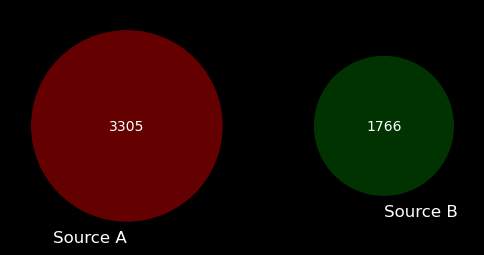

In [7]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
venn2([entities_a, entities_b], set_labels=("Source A", "Source B"))
plt.show()


In [8]:
# df1['match_Labels_y'] = df1['match_Labels_y'].fillna("['Invalid']")

df1['match_Labels_y'].value_counts()

match_Labels_y
['Valid']      2296
['Invalid']    1022
Name: count, dtype: int64

In [ ]:
df1.columns

Index(['title', 'author', 'source', 'content', 'topic', 'url', 'keywords',
       'query', 'cleaned_content', 'entities', 'article_id', 'entities_Group',
       'labels_Group', 'Key_Phrases', 'Actions', 'Load_Date', 'Language',
       'Person', 'matching_events', 'character_count', 'word_count',
       'processed_text', 'processed_tokens_split', 'num_tokens', 'story_chain',
       'match_score_faiss', 'temporal_scores', 'match_Labels_x',
       'actor_entities_y', 'geo_entities_y', 'event_id', 'actor_score',
       'geo_score', 'combined_score', 'match_score', 'temporal_score_exp',
       'final_scores_y', 'match_Labels_y'],
      dtype='object')

In [10]:
# df1 = df1.drop(columns = ['max_score_index'])
# df1.to_csv("/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/article_event_matches_mergedII.csv", index=False)

In [11]:
df2.columns

Index(['title', 'date_str', 'author', 'icon', 'siteName', 'tags_label', 'text',
       'sentiment', 'pageUrl', 'quotes_quote', 'event_id', 'entities',
       'entities_Group', 'labels_Group', 'actor_entities', 'geo_entities'],
      dtype='object')

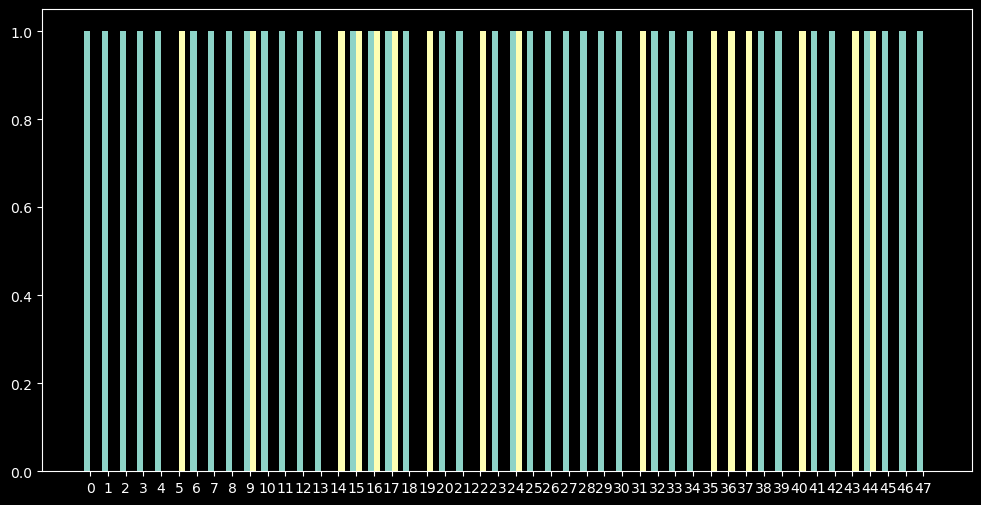

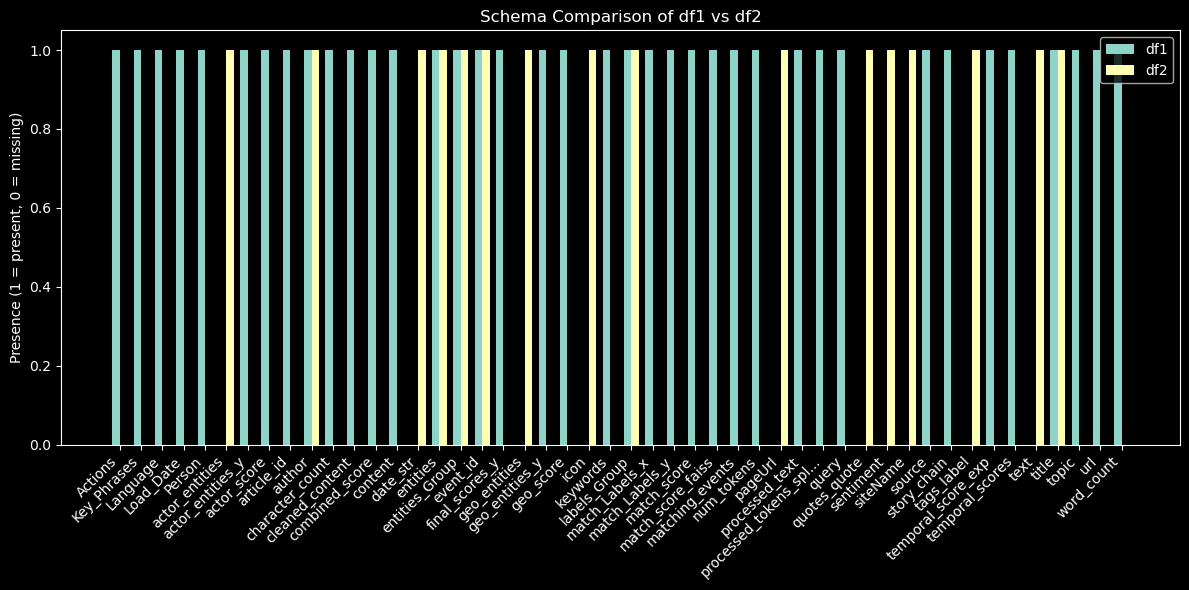

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# import re

# def is_valid_entity(e):
#     # Remove empty, numeric, percentages, and short words
#     if not isinstance(e, str):
#         return False
#     if re.match(r'^\d+%?$', e):  # numbers or percentages
#         return False
#     if re.match(r'^\d{1,2}[./-]\d{1,2}[./-]?\d{0,4}$', e):  # dates like 23/10/2022
#         return False
#     if len(e) <= 2:
#         return False
#     return True

# df1_exploded['entities_Group'] = df1_exploded['entities_Group'].apply(lambda x: x if is_valid_entity(x) else None)
# df2_exploded['entities_Group'] = df2_exploded['entities_Group'].apply(lambda x: x if is_valid_entity(x) else None)


# # Get sets of columns
# cols1 = set(df1.columns)
# cols2 = set(df2.columns)

# # Build a dataframe for presence/absence
# schema_df = pd.DataFrame({
#     "Column": sorted(cols1.union(cols2)),
#     "In_df1": [1 if c in cols1 else 0 for c in sorted(cols1.union(cols2))],
#     "In_df2": [1 if c in cols2 else 0 for c in sorted(cols1.union(cols2))]
# })

# # Plot side-by-side bar chart
# x = range(len(schema_df["Column"]))
# width = 0.35

# fig, ax = plt.subplots(figsize=(12, 6))
# ax.bar([p - width/2 for p in x], schema_df["In_df1"], width=width, label="df1")
# ax.bar([p + width/2 for p in x], schema_df["In_df2"], width=width, label="df2")

# ax.set_xticks(x)

# def shorten_label(label, max_len=20):
#     return (label[:max_len] + '...') if len(label) > max_len else label

# ax.set_xticklabels([shorten_label(e) for e in schema_df["Column"]], rotation=45, ha='right')

# ax.set_ylabel("Presence (1 = present, 0 = missing)")
# ax.set_title("Schema Comparison of df1 vs df2")
# ax.legend()
# plt.tight_layout()
# plt.show()


In [50]:
# Check exact column names
set(df1.columns) - set(df2.columns)   # Columns in df1 but missing in df2
set(df2.columns) - set(df1.columns)   # Columns in df2 but missing in df1


{'actor_entities',
 'date_str',
 'geo_entities',
 'icon',
 'pageUrl',
 'quotes_quote',
 'sentiment',
 'siteName',
 'tags_label',
 'text'}

In [51]:
from difflib import get_close_matches

# Columns in each dataset
cols_df1 = list(df1.columns)
cols_df2 = list(df2.columns)

# Function to find close matches
def fuzzy_column_match(source_cols, target_cols, cutoff=0.8):
    matches = {}
    for col in source_cols:
        close = get_close_matches(col, target_cols, n=1, cutoff=cutoff)
        if close:
            matches[col] = close[0]
    return matches

# Check df1 -> df2
df1_to_df2_matches = fuzzy_column_match(cols_df1, cols_df2)
print("Potential matches from df1 -> df2:")
print(df1_to_df2_matches)

# Check df2 -> df1
df2_to_df1_matches = fuzzy_column_match(cols_df2, cols_df1)
print("Potential matches from df2 -> df1:")
print(df2_to_df1_matches)


Potential matches from df1 -> df2:
{'title': 'title', 'author': 'author', 'entities': 'entities', 'entities_Group': 'entities_Group', 'labels_Group': 'labels_Group', 'actor_entities_y': 'actor_entities', 'geo_entities_y': 'geo_entities', 'event_id': 'event_id'}
Potential matches from df2 -> df1:
{'title': 'title', 'author': 'author', 'event_id': 'event_id', 'entities': 'entities', 'entities_Group': 'entities_Group', 'labels_Group': 'labels_Group', 'actor_entities': 'actor_entities_y', 'geo_entities': 'geo_entities_y'}


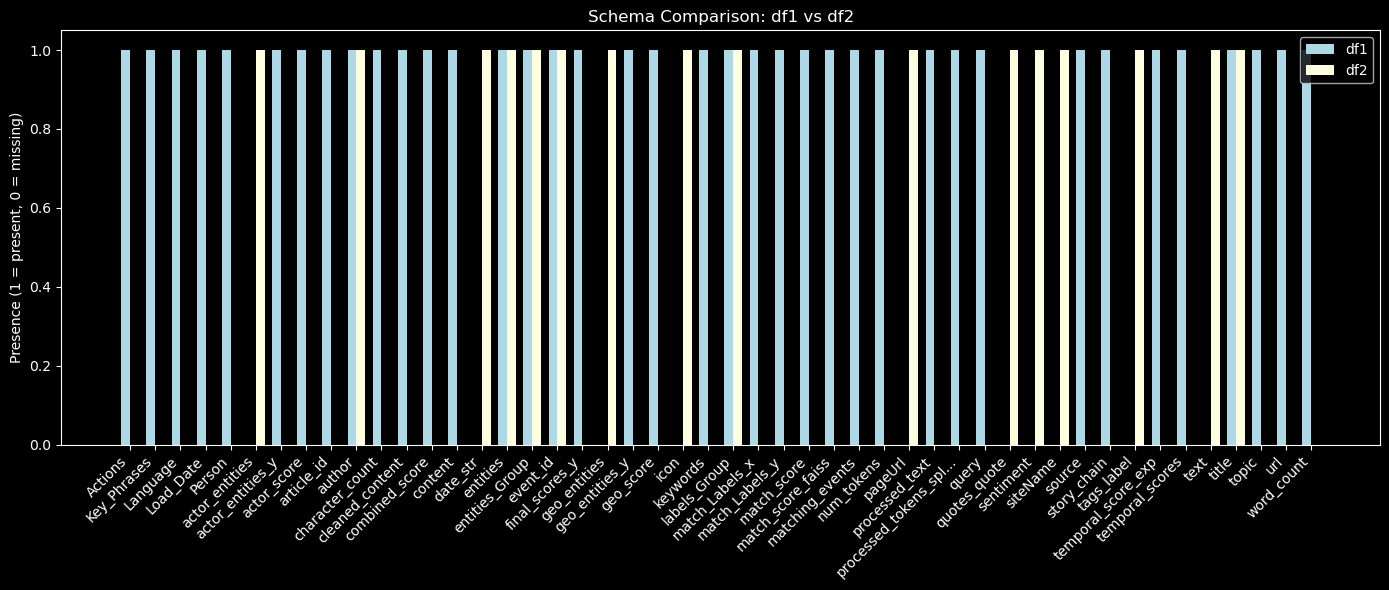

In [53]:
# Standardize df2 column names based on fuzzy matches
rename_map = {
    'actor_entities_y': 'actor_entities',
    'geo_entities_y': 'geo_entities'
}

df2_renamed = df2.rename(columns=rename_map)

# Now do the presence/absence comparison
merged = pd.DataFrame({
    'Column': df1.columns.union(df2_renamed.columns),
    'df1_present': [1 if col in df1.columns else 0 for col in df1.columns.union(df2_renamed.columns)],
    'df2_present': [1 if col in df2_renamed.columns else 0 for col in df1.columns.union(df2_renamed.columns)]
})

# Plot
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(merged))
width = 0.35

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x - width/2, merged['df1_present'], width, label='df1', color='lightblue')
ax.bar(x + width/2, merged['df2_present'], width, label='df2', color='lightyellow')

ax.set_ylabel('Presence (1 = present, 0 = missing)')
ax.set_xticks(x)
ax.set_xticklabels([col[:20] + ('...' if len(col) > 20 else '') for col in merged['Column']], rotation=45, ha='right')
ax.legend()
plt.title('Schema Comparison: df1 vs df2')
plt.tight_layout()
plt.show()


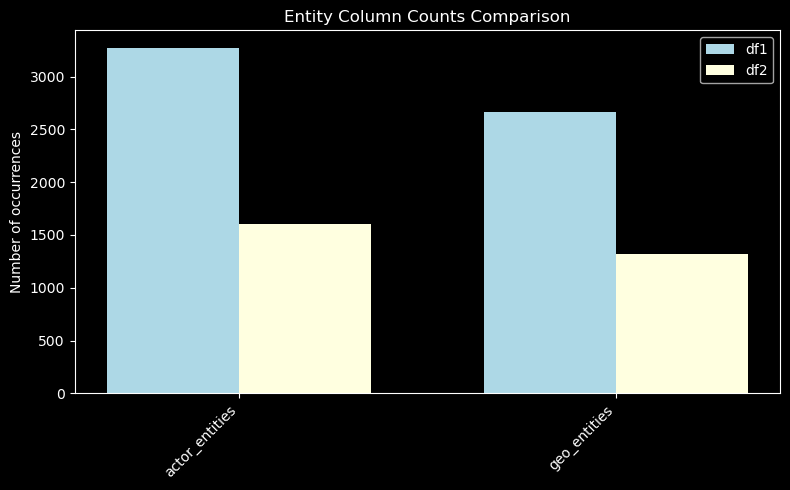

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Only entity columns
entity_cols_df2 = ['actor_entities', 'geo_entities']  # df1 names
entity_cols_df1 = ['actor_entities_y', 'geo_entities_y']  # df2 names after fuzzy matching
 # or all entity columns

rename_map = {'actor_entities_y': 'actor_entities', 'geo_entities_y': 'geo_entities'}
df2_renamed = df2.rename(columns=rename_map)

entity_cols = ['actor_entities', 'geo_entities']  # now same in both datasets

counts_df1 = df1[entity_cols_df1].nunique()
counts_df2 = df2_renamed[entity_cols_df2].nunique()

x = np.arange(len(entity_cols))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, counts_df1, width, label='df1', color='lightblue')
ax.bar(x + width/2, counts_df2, width, label='df2', color='lightyellow')

ax.set_xticks(x)
ax.set_xticklabels(entity_cols, rotation=45, ha='right')
ax.set_ylabel('Number of occurrences')
ax.set_title('Entity Column Counts Comparison')
ax.legend()
plt.tight_layout()
plt.show()



In [67]:
df2.columns

Index(['title', 'date_str', 'author', 'icon', 'siteName', 'tags_label', 'text',
       'sentiment', 'pageUrl', 'quotes_quote', 'event_id', 'entities',
       'entities_Group', 'labels_Group', 'actor_entities', 'geo_entities'],
      dtype='object')

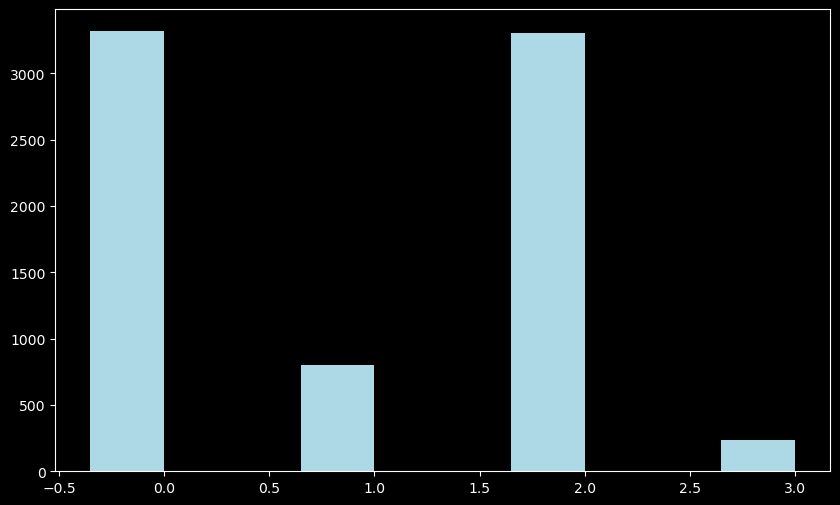

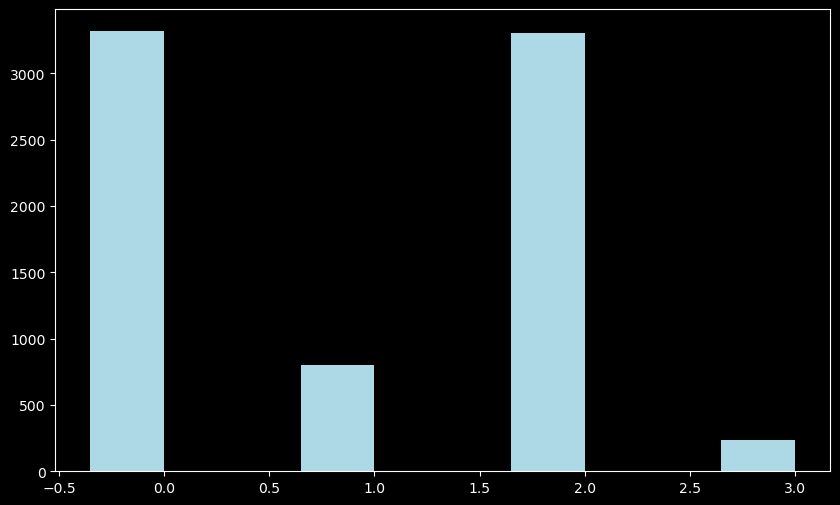

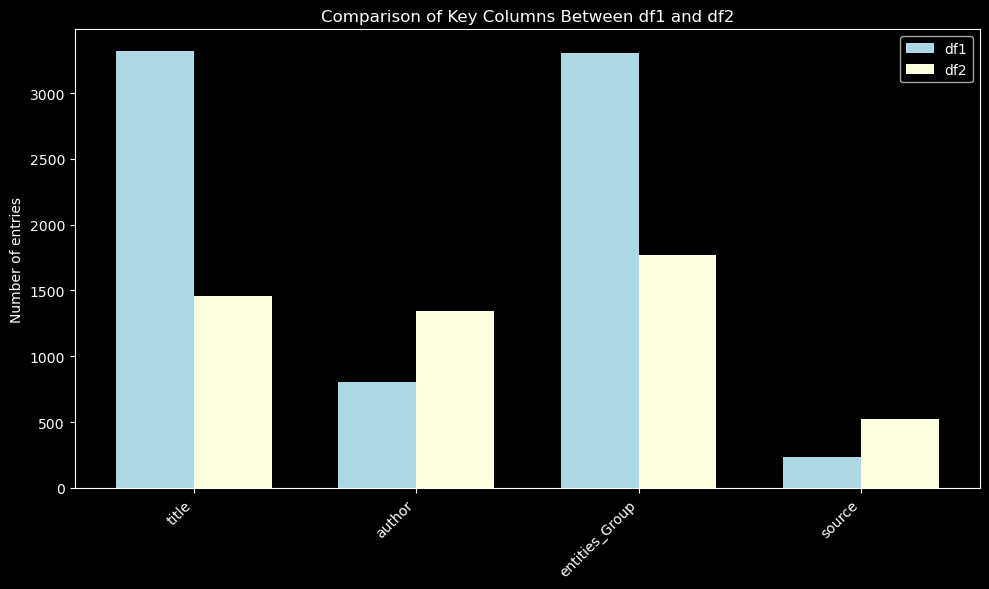

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Standardize column names in df2
rename_map = {
    'actor_entities_y': 'actor_entities',
    'geo_entities_y': 'geo_entities',
    'siteName': 'source'
}
df2_renamed = df2.rename(columns=rename_map)

# Columns to compare
columns_to_compare = ['title', 'author', 'entities_Group', 'source']

# Counts: use total rows for title/author, non-null or unique for others
counts_df1 = [
    df1['title'].nunique(),
    df1['author'].notnull().sum(),
    df1['entities_Group'].nunique(),
    df1['source'].nunique()
]

counts_df2 = [
    df2_renamed['title'].nunique(),
    df2_renamed['author'].notnull().sum(),
    df2_renamed['entities_Group'].nunique(),
    df2_renamed['source'].nunique()
]

# Plot side-by-side bar chart
x = np.arange(len(columns_to_compare))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, counts_df1, width, label='df1', color='lightblue')
ax.bar(x + width/2, counts_df2, width, label='df2', color='lightyellow')

ax.set_xticks(x)
ax.set_xticklabels(columns_to_compare, rotation=45, ha='right')
ax.set_ylabel('Number of entries')
ax.set_title('Comparison of Key Columns Between df1 and df2')
ax.legend()
plt.tight_layout()
plt.show()


In [16]:
print(len(x))
print(counts_df2)
print([type(c) for c in counts_df2])


4
[title
Ethiopia says Eritrean troops are pulling out of Tigray                                                                                                                                                                                                                                                                                                          21
Refugees find more bodies in river separating Tigray, Sudan                                                                                                                                                                                                                                                                                                      20
Ethiopia grants amnesty to high-profile political detainees                                                                                                                                                                                                                            

In [15]:
df1.title

0       can ethiopia survive? what might happen if abi...
1       ethiopia : eritrea confirms its troops are fig...
2       tigray crisis - ethiopia 's tigray war spills ...
3       ethiopia declares state of emergency; tigrayan...
4       ethiopia pm orders riposte after 'attack' on a...
                              ...                        
3313    cardin, van hollen, senate democrats press pom...
3314    ethiopia urged to end arbitrary arrests of tig...
3315    ethiopian rebels rule out 'bloodbath' if they ...
3316    ethiopia news website to resume operations aft...
3317           ethiopia peace talks start in south africa
Name: title, Length: 3318, dtype: object

In [77]:
df2.title.nunique()

1458

In [65]:
df1['labels_Group'].nunique()

3299

In [64]:
df2['labels_Group'].nunique()

1757

In [87]:
df1.columns

Index(['title', 'author', 'source', 'content', 'topic', 'url', 'keywords',
       'query', 'cleaned_content', 'entities', 'article_id', 'entities_Group',
       'labels_Group', 'Key_Phrases', 'Actions', 'Load_Date', 'Language',
       'Person', 'matching_events', 'character_count', 'word_count',
       'processed_text', 'processed_tokens_split', 'num_tokens', 'story_chain',
       'match_score_faiss', 'temporal_scores', 'match_Labels_x',
       'actor_entities_y', 'geo_entities_y', 'event_id', 'actor_score',
       'geo_score', 'combined_score', 'match_score', 'temporal_score_exp',
       'final_scores_y', 'match_Labels_y'],
      dtype='object')

Found 415 overlaps
[('fighting flares up in northern ethiopia after five-month lull', 'Ethiopia: Fighting flares in Tigray after five-month lull', 0.9291188192104339), ('fighting flares up in northern ethiopia after five-month lull', 'Ethiopia: Fighting flares in Tigray after five-month lull', 0.9291188192104339), ('fighting flares up in northern ethiopia after five-month lull', 'Ethiopia: Fighting flares in Tigray after five-month lull', 0.9291188192104339), ('witnesses: eritrean troops still killing civilians in tigray', 'Witnesses: Eritrean troops still killing civilians in Tigray', 1.0000000000000002), ('witnesses: eritrean troops still killing civilians in tigray', 'Witnesses: Eritrean troops still killing civilians in Tigray', 1.0000000000000002)]


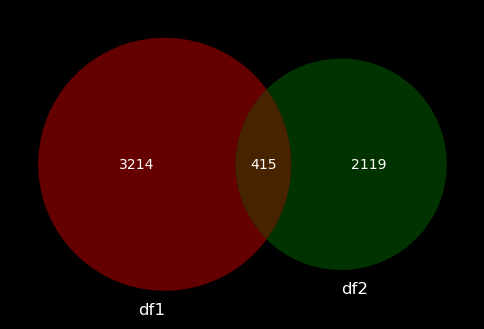

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# ---------------------------
# 1. Extract unique titles
# ---------------------------
set1 = df1["title"].dropna().unique()
set2 = df2["title"].dropna()

titles = list(set1) + list(set2)

# ---------------------------
# 2. TF-IDF Vectorization
# ---------------------------
vectorizer = TfidfVectorizer(stop_words="english").fit(titles)
tfidf1 = vectorizer.transform(set1)
tfidf2 = vectorizer.transform(set2)

sim_matrix = cosine_similarity(tfidf1, tfidf2)

threshold = 0.8  # tweak this
overlap_pairs = np.argwhere(sim_matrix > threshold)

overlaps = [(set1[i], set2[j], sim_matrix[i, j]) for i, j in overlap_pairs]
print(f"Found {len(overlaps)} overlaps")
print(overlaps[:5])

only_set1 = len(set1) - len({i for i, j in overlap_pairs})
only_set2 = len(set2) - len({j for i, j in overlap_pairs})
overlap_count = len(overlap_pairs)

# Plot
plt.figure(figsize=(6,6))
venn2(subsets=(only_set1, only_set2, overlap_count), set_labels=("df1", "df2"))
plt.show()


In [93]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example: df1 and df2 have "title" columns
titles1 = df1["title"].dropna().unique().tolist()
titles2 = df2["title"].dropna().unique().tolist()

# Combine all titles for consistent vectorization
all_titles = titles1 + titles2

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words="english").fit(all_titles)
tfidf1 = vectorizer.transform(titles1)
tfidf2 = vectorizer.transform(titles2)

# Compute cosine similarity between every pair (df1 vs df2)
similarity_matrix = cosine_similarity(tfidf1, tfidf2)

# For each title in df1, find the best match in df2
matches = []
threshold = 0.75  # adjust as needed
for i, t1 in enumerate(titles1):
    j = similarity_matrix[i].argmax()  # index of best match in df2
    score = similarity_matrix[i, j]
    if score >= threshold:
        matches.append((t1, titles2[j], score))

# Convert to DataFrame for inspection
matches_df = pd.DataFrame(matches, columns=["df1_title", "df2_title", "similarity"])

print(matches_df.head(10))


                                           df1_title  \
0  fighting flares up in northern ethiopia after ...   
1  witnesses: eritrean troops still killing civil...   
2  tigray war rips thousands of children from par...   
3  ethiopia starts dismantling regional military ...   
4  u.s. imposes restrictions on ethiopia assistan...   
5              new air strike hits capital of tigray   
6  air strike hits tigray capital mekele : rebels...   
7  first humanitarian convoy in three months arri...   
8  un : sides in ethiopia 's tigray conflict may ...   
9  transformation to conflict: ethiopia under abi...   

                                           df2_title  similarity  
0  Ethiopia: Fighting flares in Tigray after five...    0.934662  
1  Witnesses: Eritrean troops still killing civil...    1.000000  
2  Tigray war rips thousands of children from par...    1.000000  
3  Ethiopia starts dismantling regional military ...    1.000000  
4  US imposes restrictions on Ethiopia over Tigr

In [98]:
df3 = pd.read_csv("/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/Main_Dataset2.csv")

In [101]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1️⃣ Lists of titles
titles1 = df1["title"].dropna().unique()
titles2 = df2["title"].dropna().unique()

# Keep track of match_Labels from df1
df1_labels = df1.set_index("title")["match_Labels_y"].to_dict()  # or df3 if labels are there

# 2️⃣ TF-IDF vectorization
vectorizer = TfidfVectorizer().fit(list(titles1) + list(titles2))
tfidf1 = vectorizer.transform(titles1)
tfidf2 = vectorizer.transform(titles2)

# 3️⃣ Cosine similarity
sim_matrix = cosine_similarity(tfidf1, tfidf2)

# 4️⃣ Collect overlapping titles above threshold
threshold = 0.75
overlaps = []
for i, t1 in enumerate(titles1):
    for j, t2 in enumerate(titles2):
        if sim_matrix[i, j] >= threshold:
            overlaps.append({
                "df1_title": t1,
                "df2_title": t2,
                "similarity": sim_matrix[i, j],
                "match_Labels": df1_labels.get(t1, None)  # attach match_Labels
            })

# 5️⃣ Convert to DataFrame
overlaps_df = pd.DataFrame(overlaps)

# ✅ Display
print(overlaps_df.head(20))


                                            df1_title  \
0   fighting flares up in northern ethiopia after ...   
1   witnesses: eritrean troops still killing civil...   
2   tigray war rips thousands of children from par...   
3   tigray war rips thousands of children from par...   
4   ethiopia starts dismantling regional military ...   
5   u.s. imposes restrictions on ethiopia assistan...   
6               new air strike hits capital of tigray   
7   air strike hits tigray capital mekele : rebels...   
8   transformation to conflict: ethiopia under abi...   
9   transformation to conflict: ethiopia under abi...   
10  ethiopia 's abiy: from peace laureate to warti...   
11  ethiopia 's abiy: from peace laureate to warti...   
12  ethiopia 's abiy: from peace laureate to warti...   
13  ethiopia 's abiy: from peace laureate to warti...   
14  only 10% of needed aid reaching war-hit tigray...   
15  un report claims somali troops 'fought' in tig...   
16  ethopia - us secretary of s

In [108]:
df1[df1['title'].str.contains("Witnesses: Eritrean troops still killing civi", case=False)]['Load_Date']

64    2023-08-22
Name: Load_Date, dtype: object

In [111]:
df2[df2['title'].str.contains("Witnesses: Eritrean troops still killing civi", case=False)]['date_str']

379     2022-10-30
1800    2022-10-30
Name: date_str, dtype: object

In [121]:
import re

def extract_top_date(text):
    # Split text by lines and clean up
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    
    # Look only at first few lines (avoid bottom 'Load-Date')
    for line in lines[:5]:
        match = re.search(r'(January|February|March|April|May|June|July|August|September|October|November|December) \d{1,2}, \d{4} \w+', line)
        if match:
            return match.group(0)
    return None

df1['Load_Date'] = df1['content'].apply(extract_top_date)

print(df1[['content', 'Load_Date']].head())


                                             content  \
0  Can Ethiopia Survive? What Might Happen If Abi...   
1  Ethiopia: Eritrea Confirms Its Troops Are Figh...   
2  Tigray crisis - Ethiopia's Tigray war spills i...   
3  Ethiopia declares state of emergency; Tigrayan...   
4  Ethiopia PM orders riposte after 'attack' on a...   

                    Load_Date  
0     November 5, 2021 Friday  
1       April 19, 2021 Monday  
2        July 18, 2021 Sunday  
3  November 3, 2021 Wednesday  
4  November 4, 2020 Wednesday  


In [120]:
df1[df1['title'].str.contains("Witnesses: Eritrean troops still killing civi", case=False)]['Date']

64    October 30, 2022 Sunday
Name: Date, dtype: object

In [122]:
df1.to_csv('/Users/amalkurian/Desktop/Dissertation/Bias Detection/Deliverables/matching_articles04.csv', index=False)
